In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import glob

In [6]:
import tqdm

In [7]:
filenames = list(glob.glob('./15thc_LUNA Bodleian/*.jpg'))


In [8]:
print(len(filenames))

1612


In [9]:
books = []
i = 0

In [10]:
for fn in tqdm.tqdm_notebook(filenames):
    img = cv2.imread(fn)
    img = img[:,:,[2,1,0]]
    img = np.expand_dims(img,axis=0)
    books.extend(img)

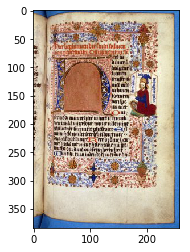

In [11]:
plt.imshow(books[5])

In [12]:
import skimage
from skimage import color
from skimage import feature

In [13]:
def hogvec(img):
    img = np.resize(img,(128,128));
    imbw = color.rgb2gray(img);
    (hogvec, hogimg) = feature.hog(imbw, visualise=True);
    return hogvec

In [14]:
hogs = []
for b in tqdm.tqdm_notebook(books):
    hogs.append(np.expand_dims(hogvec(b),axis=0))

In [15]:
from sklearn.neighbors import NearestNeighbors

In [16]:
hogsA = np.asarray(hogs)

In [17]:
hogsA = np.squeeze(hogsA)

In [18]:
hogsA.shape

(1612, 15876)

In [19]:
from sklearn.cluster import KMeans

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=500)
hogsR = pca.fit_transform(hogsA)

In [22]:



numClusters = 6



kmeans = KMeans(n_clusters=numClusters, random_state=0,max_iter=300).fit(hogsR)

predictions = kmeans.predict(hogsR)

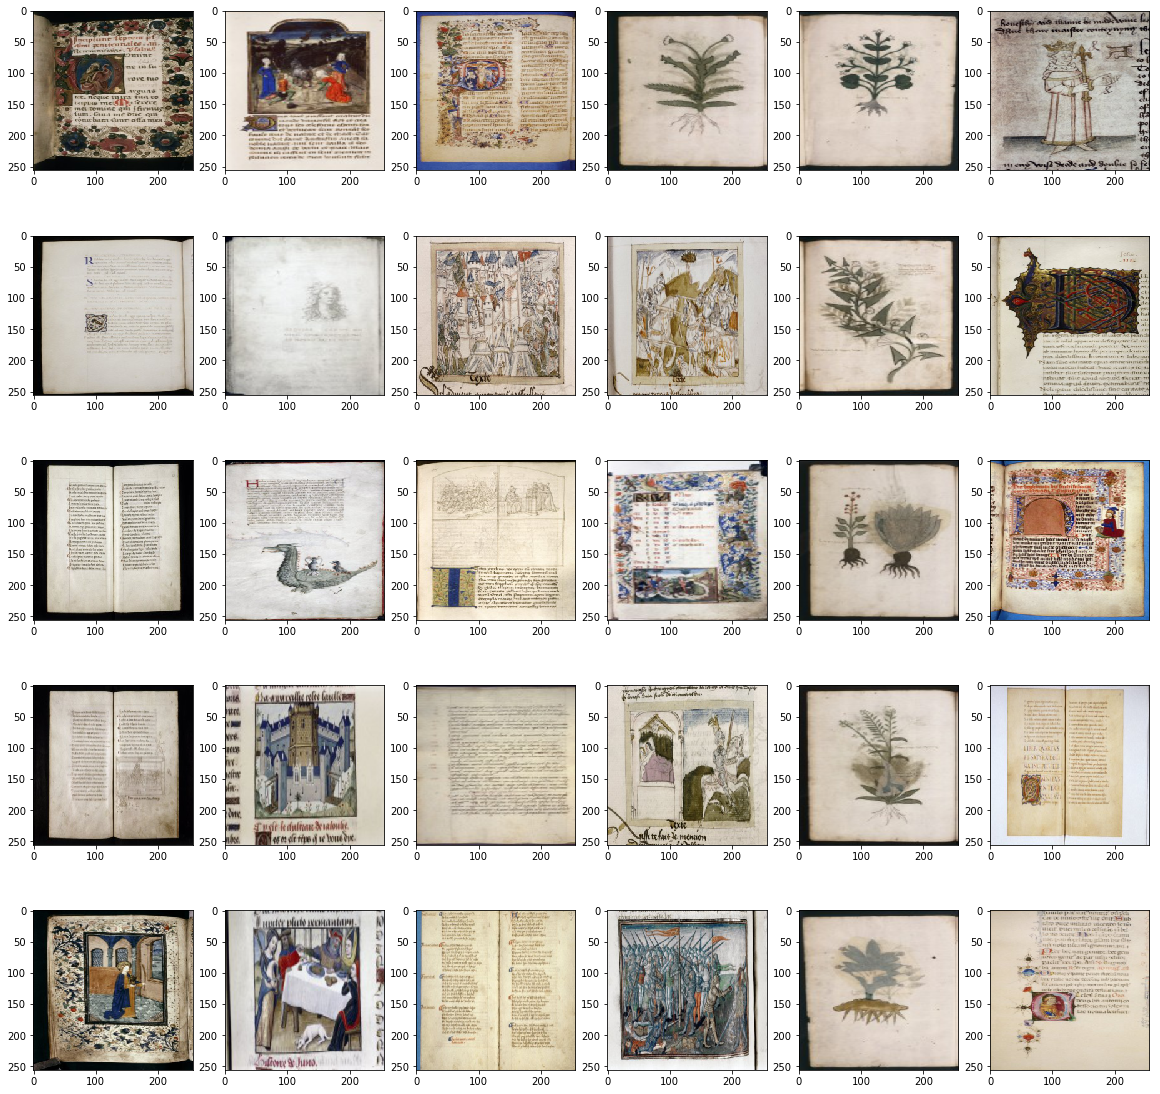

In [23]:


numVis = 5

imsize = (256,256)

plt.figure(figsize=(20,20))

for viscluster in range(numClusters):

    subindex = (predictions==viscluster)
    subbooks = []
    for i in range(len(books)):
        if(subindex[i] == True):
            subbooks.append(books[i])

    
    for i in range( np.min( [np.sum(predictions==viscluster),numVis])  ):
        plt.subplot(numVis,numClusters,    (i*numClusters) + 1 + viscluster)
        plt.imshow( cv2.resize(subbooks[i],imsize))

    

In [24]:
def edgy(inimg):
    inimg = cv2.resize(inimg,(128,128))
    cannyimg = cv2.Canny(inimg,150,300);
    return cannyimg

In [25]:
edgeV = np.zeros((len(books),16384))
i = 0

for b in tqdm.tqdm_notebook(books):
    ci = edgy(b)
    cf = ci.flatten()
    edgeV[i,:] = cf
    i = i + 1

In [26]:
edgy(b).shape

(128, 128)

In [27]:
pca = PCA(n_components=50)
edgeR = pca.fit_transform(edgeV)

In [28]:

numClusters = 6

kmeans = KMeans(n_clusters=numClusters, random_state=0,max_iter=300).fit(edgeR)

predictions = kmeans.predict(edgeR)

In [29]:
predictions

array([3, 5, 5, ..., 1, 5, 1], dtype=int32)

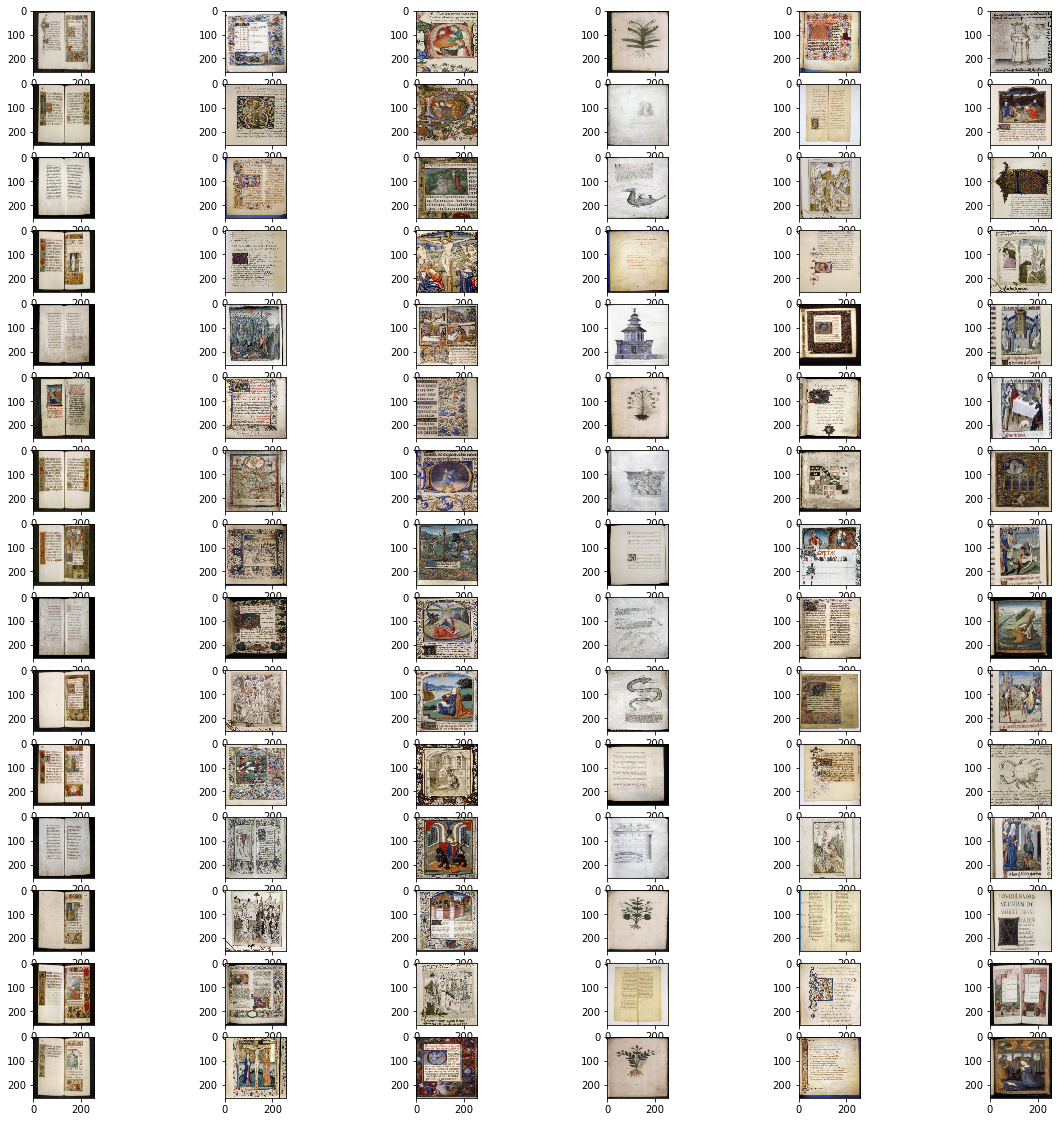

In [30]:
numVis = 15

imsize = (256,256)

plt.figure(figsize=(20,20))

for viscluster in range(numClusters):

    subindex = (predictions==viscluster)
    subbooks = []
    for i in range(len(books)):
        if(subindex[i] == True):
            subbooks.append(books[i])

    
    for i in range( np.min( [np.sum(predictions==viscluster),numVis])  ):
        plt.subplot(numVis,numClusters,    (i*numClusters) + 1 + viscluster)
        plt.imshow( cv2.resize(subbooks[i],imsize))

    

In [31]:
ai = np.zeros((256,256,3,len(books)))
i = 0
for b in books:
    ai[:,:,:,i] = cv2.resize(b,(256,256))
    i = i + 1
    
    
ei = np.zeros((256,256,len(books)))
i = 0
for b in books:
    ei[:,:,i] = cv2.resize(cv2.Canny(b,150,300)  ,(256,256))
    i = i + 1    

In [32]:


vispred = 5

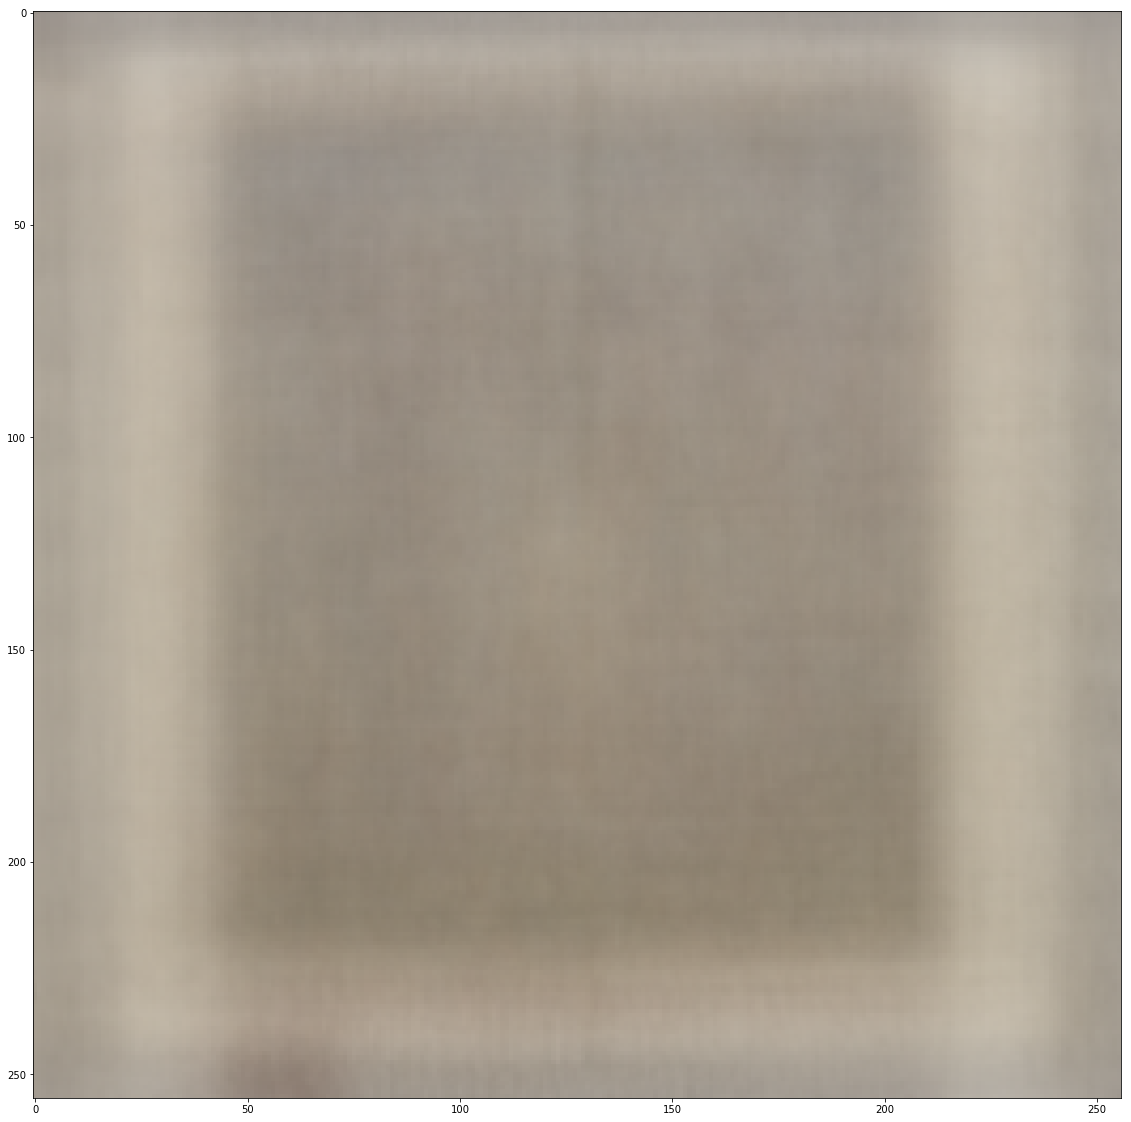

In [33]:
meanimg = np.mean(ai[:,:,:,predictions==vispred],axis=3)


plt.figure(figsize=(20,20))
plt.imshow(meanimg/256)

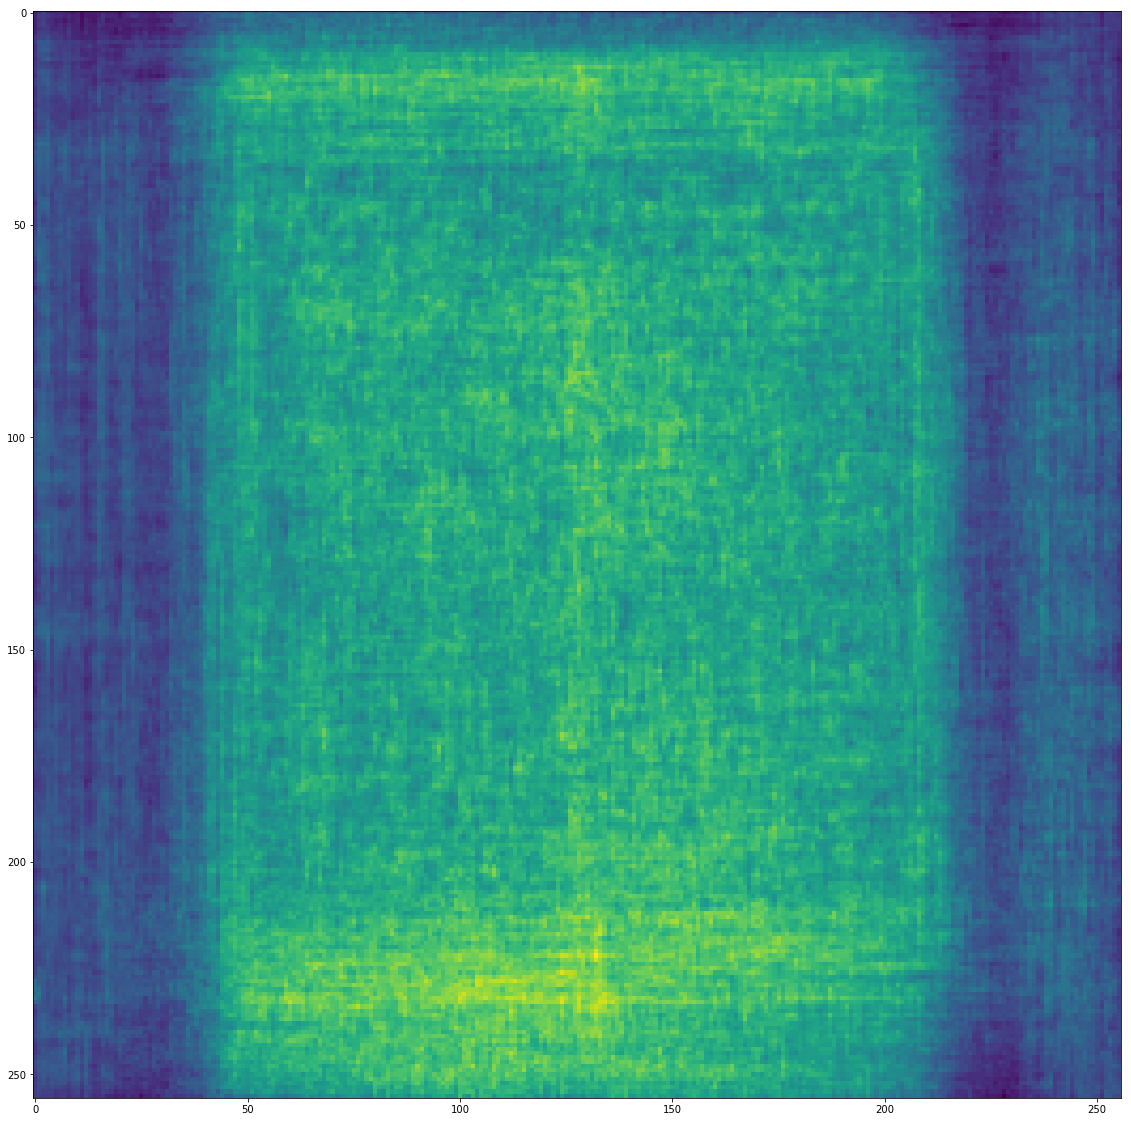

In [34]:
meanimg = np.mean(ei[:,:,predictions==vispred],axis=2)


plt.figure(figsize=(20,20))
plt.imshow(meanimg)

In [35]:
colV = np.zeros((len(books),49152))
i = 0

for b in tqdm.tqdm_notebook(books):
    ci = cv2.resize(b,(128,128))
    cf = ci.flatten()
    colV[i,:] = cf
    i = i + 1

In [36]:
pca = PCA(n_components=50)
colR = pca.fit_transform(colV)

In [37]:

numClusters = 6

kmeans = KMeans(n_clusters=numClusters, random_state=0,max_iter=300).fit(colR)

predictions = kmeans.predict(colR)




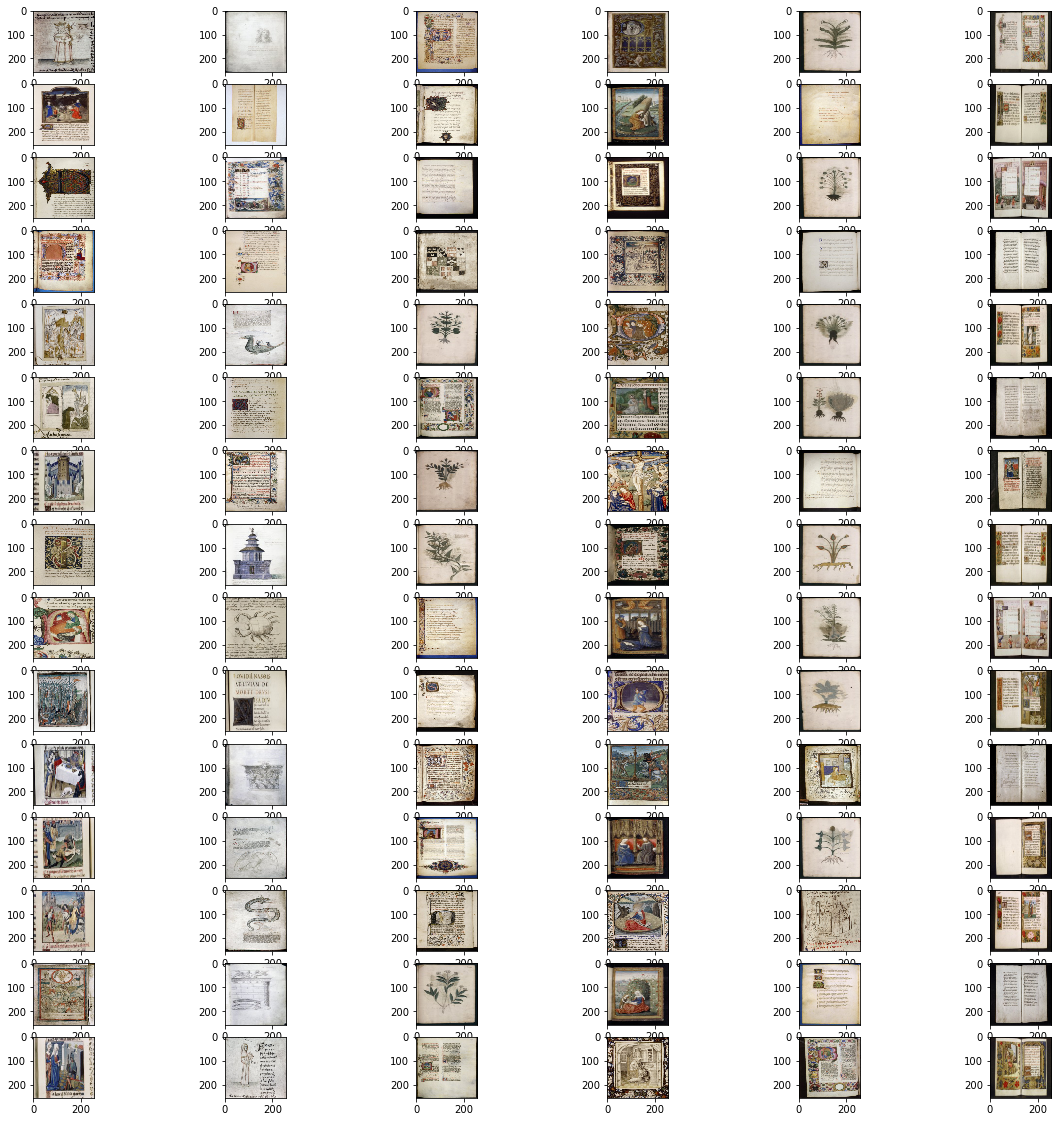

In [38]:
numVis = 15

imsize = (256,256)

plt.figure(figsize=(20,20))

for viscluster in range(numClusters):

    subindex = (predictions==viscluster)
    subbooks = []
    for i in range(len(books)):
        if(subindex[i] == True):
            subbooks.append(books[i])

    
    for i in range( np.min( [np.sum(predictions==viscluster),numVis])  ):
        plt.subplot(numVis,numClusters,    (i*numClusters) + 1 + viscluster)
        plt.imshow( cv2.resize(subbooks[i],imsize))

    

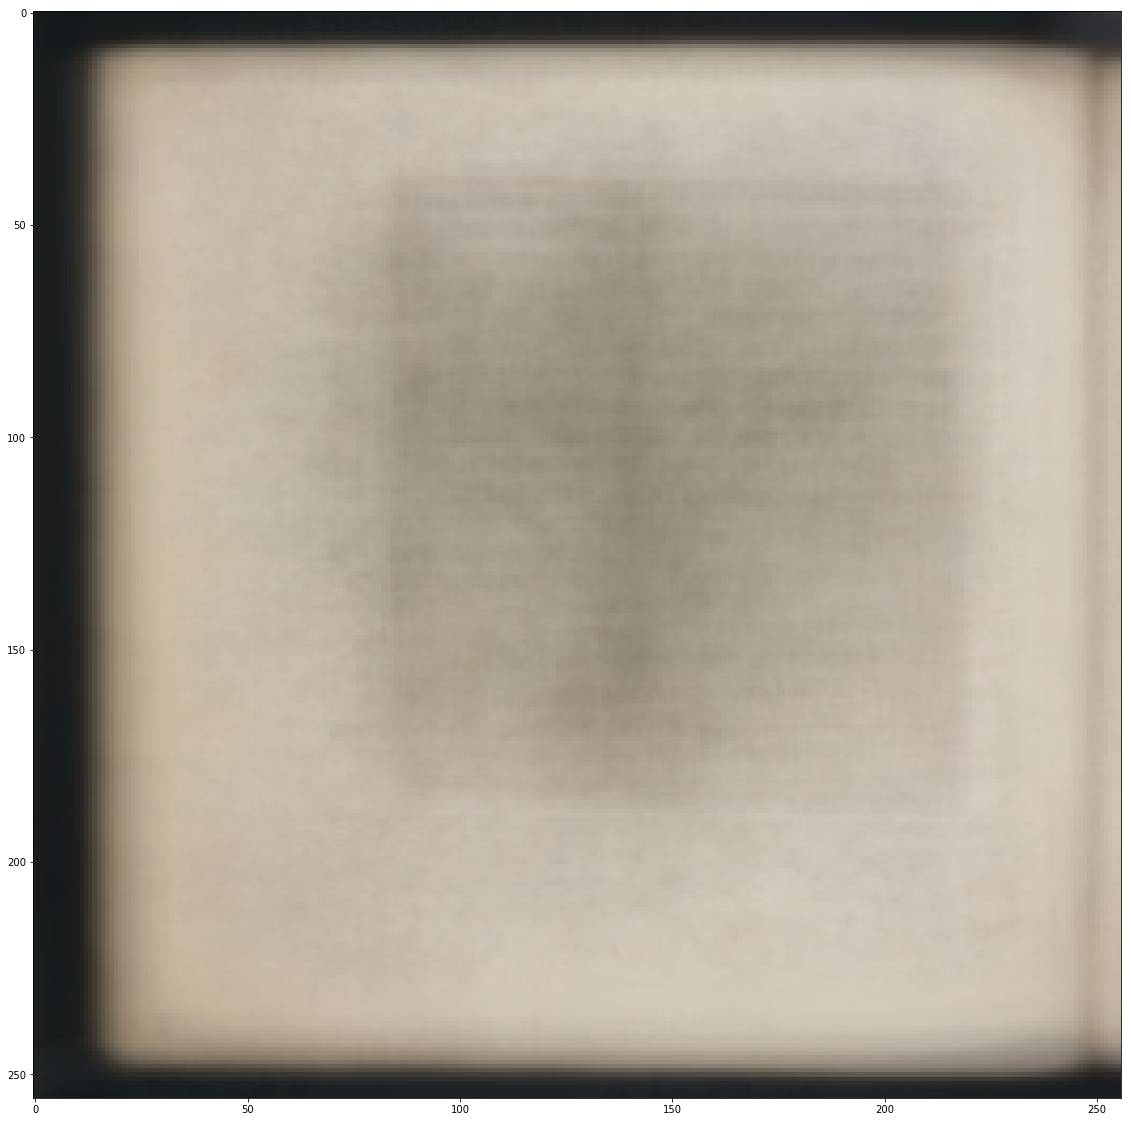

In [39]:


vispred = 4

meanimg = np.mean(ai[:,:,:,predictions==vispred],axis=3)


plt.figure(figsize=(20,20))
plt.imshow(meanimg/256)